## Описание
На этот раз данные имеют следующую структуру:

записываются для каждого пользователя, совершившего покупки, каждый день для каждой даты есть своя папка, внутри неё – папки для каждого пользователя внутри каждой папки есть файл data.csv, где и хранятся данные 
Схематично выглядит так:

* └── data
*   ├── 2020-12-30
*   │  ├── FirstName_LastName1
*   │  │   └── data.csv
*   │  ├── FirstName_LastName2
*   │  │   └── data.csv
*   │  └── FirstName_LastName3
*   │      └── data.csv
*   └── 2020-12-31
*      ├── FirstName_LastName1
*      │   └── data.csv
*      └── FirstName_LastName5
*          └── data.csv

Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

## Задачи
1) Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

2) Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

3) Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

4) Визуализируйте продажи по дням.

5) Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [43]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
os.listdir('/home/jupyter-g.sidorkin-15/shared/homeworks/python_ds_miniprojects/4/data/')

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [55]:
path = '/home/jupyter-g.sidorkin-15/shared/homeworks/python_ds_miniprojects/4/data'

# датафрейм для всех данных
df = pd.DataFrame()

# считываем все csv файлы из всех папок
for date in os.listdir(path):
    for name in os.listdir(f'{path}/{date}'):
        for file in os.listdir(f'{path}/{date}/{name}'):
            # считываем csv файл
            data = pd.read_csv(f'{path}/{date}/{name}/{file}')
            
            # добавляем колонки name и date в data
            data['name'] = name
            data['date'] = date
            
            # добавляем data в общий датафрейм
            df = pd.concat([df, data])

In [56]:
df.head()

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05


In [57]:
# обновляем индексы
df.reset_index(drop=True, inplace=True)
# дропаем лишнюю колонку
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [58]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


Выясните, какой пользователь купил больше всего товаров. 
Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [59]:
client_quantity = df \
    .groupby('name') \
    .agg({'quantity': 'sum'}) \
    .sort_values(by='quantity', ascending=False)
client_quantity

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [60]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [61]:
top_10_products = df.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head(10)
top_10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


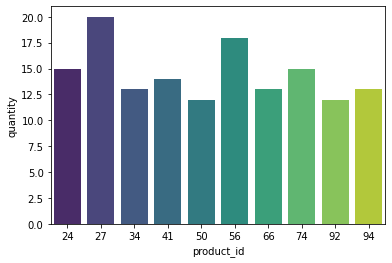

In [62]:
ax = sns.barplot(x='product_id', y='quantity', data=top_10_products, palette='viridis')

In [63]:
df.groupby('product_id', as_index=False).agg({'quantity': 'sum'}).query('product_id == 56')

,product_id,quantity
42,56,18


Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [64]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [65]:
sales_by_date = df.groupby('date', as_index=False).agg({'quantity': 'sum'})
sales_by_date

,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


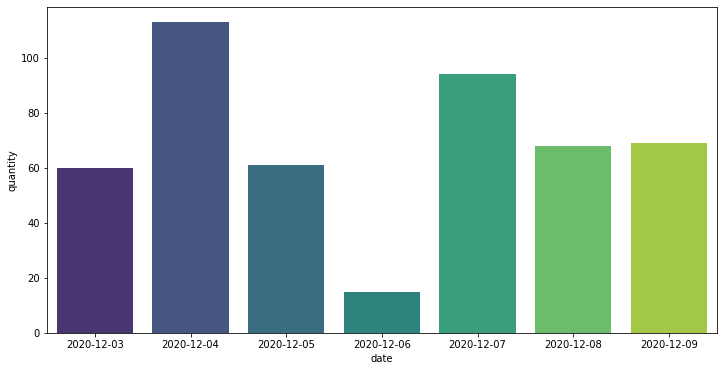

In [66]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='date', y='quantity', data=sales_by_date, palette='viridis')

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [71]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [75]:
df.drop_duplicates(subset=['product_id', 'name', 'date'])\
    .groupby(['name', 'product_id'])\
    .agg({'date': 'count'})\
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
